In [42]:
import pandas as pd
import numpy as np
import random
from preprocess_no_eth_ip_classification import process_df
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
plt.rcParams["figure.figsize"] = (16,9)

normal_df = pd.read_csv('../data/normal1.csv')
processed_normal = process_df(normal_df)

attack_df = pd.read_csv('../data/attack1.csv')
processed_attack = process_df(attack_df)

In [43]:
x_normal_train, x_normal_test = train_test_split(processed_normal.values, test_size=0.2, random_state=42)

In [44]:
processed_attack

,octet_1_ip_src,octet_2_ip_src,octet_3_ip_src,octet_4_ip_src,octet_1_ip_dst,octet_2_ip_dst,octet_3_ip_dst,octet_4_ip_dst,length,protocol.sport,protocol.dport,source_pod,source_external,destination_pod,destination_external,TCP,UDP,packet_flow
0,-0.056227,-0.147327,-0.114570,-0.670627,-0.215435,0.247127,-0.236432,-0.456078,-0.122614,-0.711639,1.467484,0.0,1.0,1.0,0.0,1.0,0.0,-2.885447
1,-0.056227,0.116468,-0.114570,-0.487903,0.375614,-3.334647,6.111377,4.519372,-0.005414,0.570995,-0.634366,1.0,0.0,0.0,1.0,1.0,0.0,-2.885447
2,1.648743,-7.665477,9.166199,9.074635,-0.215435,0.247127,-0.236432,-0.456078,-0.106387,-0.771593,0.701942,0.0,1.0,1.0,0.0,1.0,0.0,-2.885447
3,-0.056227,0.116468,-0.114570,-0.487903,0.375614,-3.334647,6.111377,4.519372,-0.225390,0.570995,-0.634366,1.0,0.0,0.0,1.0,1.0,0.0,-2.885447
4,-0.056227,0.116468,-0.114570,-0.487903,-0.215435,0.125711,-0.236432,-0.551151,-0.225390,1.340134,-0.574692,1.0,0.0,0.0,1.0,1.0,0.0,-2.885447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070549,26.882303,-11.820245,5.901607,0.060267,-0.215435,0.247127,-0.236432,-0.392697,-0.074833,-1.200721,1.605593,0.0,1.0,1.0,0.0,0.0,1.0,-2.998014
1070550,-0.056227,0.116468,-0.114570,-0.366088,-0.215435,0.247127,-0.236432,-0.329315,0.027041,-1.200721,1.315722,1.0,0.0,1.0,0.0,0.0,1.0,-2.998014
1070551,0.455264,-11.424553,3.010111,2.801122,-0.215435,0.247127,-0.236432,-0.329315,-0.225390,-1.182015,1.184583,0.0,1.0,1.0,0.0,1.0,0.0,-2.998014
1070552,-0.056227,0.116468,-0.114570,-0.244272,-0.038121,-5.064825,1.900770,1.255223,-0.236208,1.055904,-1.042868,1.0,0.0,0.0,1.0,1.0,0.0,-2.998014


In [45]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Activation

# model = Sequential()
# model.add(Dense(10, input_dim=processed_normal.values.shape[1], activation='LeakyReLU'))
# model.add(Dense(3, activation='LeakyReLU')) # size to compress to
# model.add(Dense(10, activation='LeakyReLU'))
# model.add(Dense(processed_normal.values.shape[1])) # Multiple output neurons
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(x_normal_train,x_normal_train,verbose=1,epochs=20)
# model.save("now_not_so_basic_model_v2")
model = keras.models.load_model('now_not_so_basic_model_v2')

In [46]:
attack_df.shape

(1070554, 56)

In [47]:
from sklearn import metrics
pred_normal_train = model.predict(x_normal_train)
print(np.sqrt(metrics.mean_squared_error(pred_normal_train,x_normal_train)))

pred_normal_test = model.predict(x_normal_test)
print(np.sqrt(metrics.mean_squared_error(pred_normal_test,x_normal_test)))

2022-04-12 20:38:56.905434: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.1809087058156798
0.18007366740210773


In [48]:
normal_values = processed_normal.values

normal_predictions = model.predict(normal_values)

In [49]:
from sklearn import metrics
normal_score_list = []

for index , x in enumerate(normal_predictions):
    normal_score_list.append(np.sqrt(metrics.mean_squared_error(normal_values[index],normal_predictions[index])))
    
normal_df['score'] = normal_score_list

In [50]:
normal_df['score'] = normal_score_list

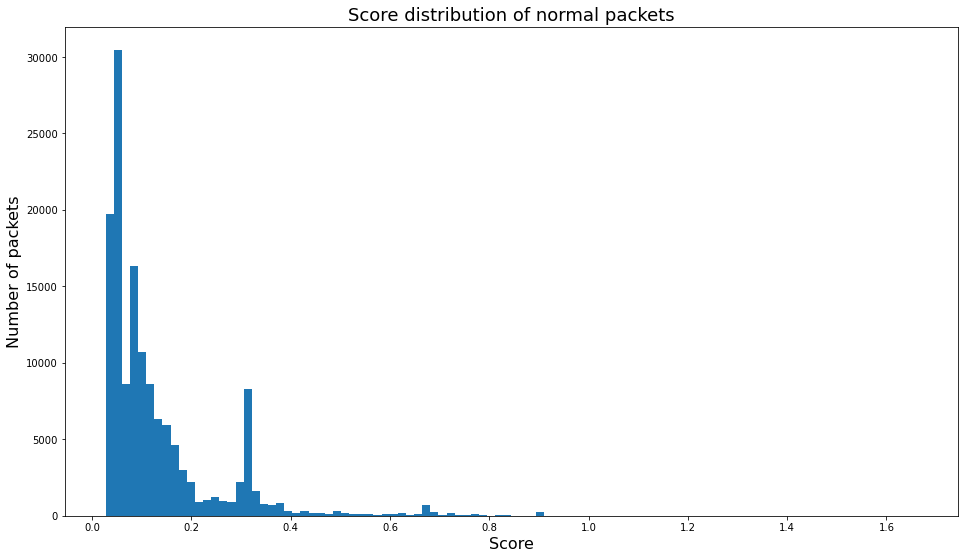

In [51]:
plt.hist(normal_score_list,bins = 100)
plt.xlabel("Score", fontsize = 16)
plt.ylabel("Number of packets",fontsize = 16)
plt.title("Score distribution of normal packets",fontsize = 18)
plt.savefig("score_distribution_normal.png", dpi = 300, bbox_inches = "tight")

In [52]:
normal_df['score'].describe().apply(lambda x: format(x, 'f'))

count    140538.000000
mean          0.130965
std           0.124563
min           0.027543
25%           0.049564
50%           0.087578
75%           0.155795
max           1.662013
Name: score, dtype: object

In [53]:
normal_df['score'].quantile(0.995)

0.7273987547290345

In [54]:
pro_values = processed_attack.values
pred_attack = model.predict(pro_values)

In [55]:
score_list = []
for index, x in enumerate(pred_attack):
    score_list.append(np.sqrt(metrics.mean_squared_error(pred_attack[index],pro_values[index])))

attack_df['score'] = score_list

In [56]:
attack_df['score'].describe().apply(lambda x: format(x, 'f'))

count    1070554.000000
mean           0.488171
std            0.230004
min            0.274564
25%            0.404716
50%            0.426432
75%            0.447615
max            6.573879
Name: score, dtype: object

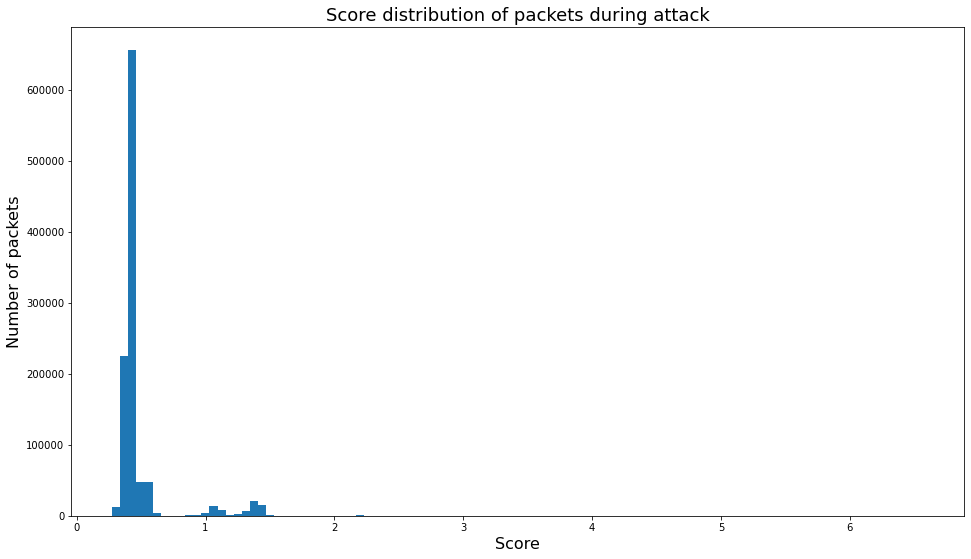

In [57]:
plt.hist(score_list,bins = 100)
plt.xlabel("Score", fontsize = 16)
plt.ylabel("Number of packets",fontsize = 16)
plt.title("Score distribution of packets during attack",fontsize = 18)
plt.savefig("score_distribution_attack_model0.png", dpi = 300, bbox_inches = "tight")

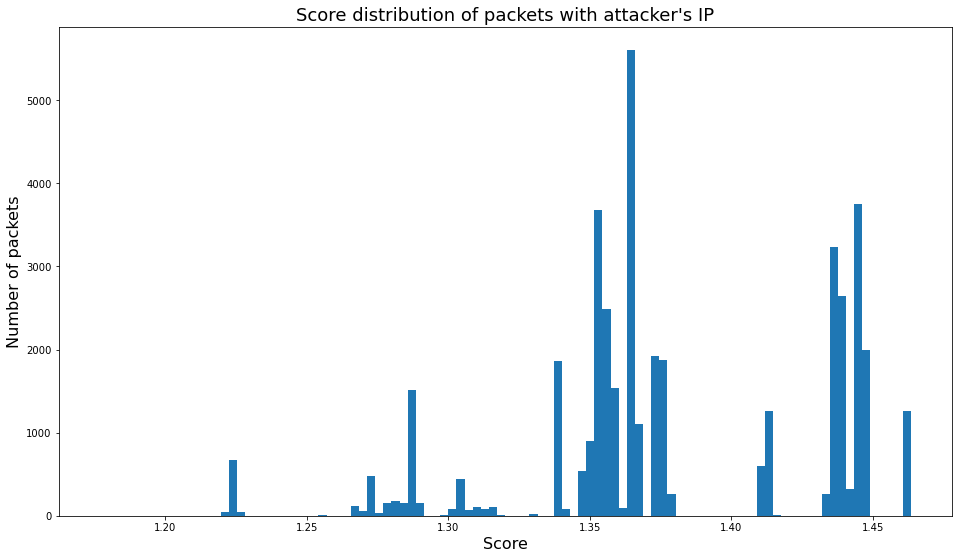

In [58]:
nmap_df = attack_df[attack_df["ip.dst"] == '89.100.107.148']

plt.hist(nmap_df['score'].to_list(),bins = 100)
plt.xlabel("Score", fontsize = 16)
plt.ylabel("Number of packets",fontsize = 16)
plt.title("Score distribution of packets with attacker's IP",fontsize = 18)
plt.savefig("score_distribution_ip_model0.png", dpi = 300, bbox_inches = "tight")

In [59]:
nmap_df['score'].describe().apply(lambda x: format(x, 'f'))

count    41824.000000
mean         1.380329
std          0.053284
min          1.176635
25%          1.354040
50%          1.365800
75%          1.437380
max          1.463493
Name: score, dtype: object

In [60]:
attack_df['score'].quantile(0.985)  

1.435445202772461

1.36579963032951

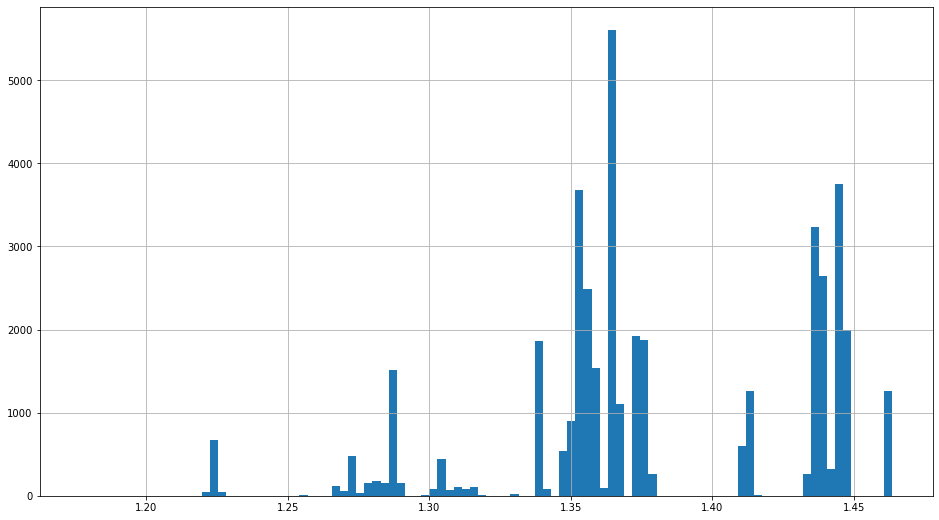

In [61]:
dictionary_attack_df = attack_df[attack_df["ip.dst"] == '89.100.107.148']
dictionary_attack_df['score'].hist(bins = 100)
dictionary_attack_df['score'].median()

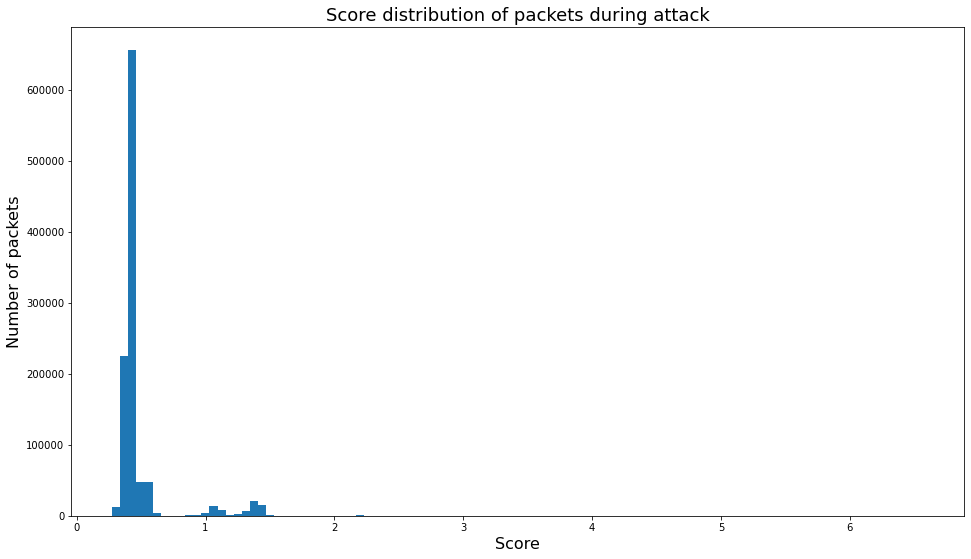

In [62]:
plt.figure(figsize=(16,9))
plt.hist(score_list,bins = 100)
plt.xlabel("Score", fontsize = 16)
plt.ylabel("Number of packets",fontsize = 16)
plt.title("Score distribution of packets during attack",fontsize = 18)
plt.savefig("score_distribution_during_attack.png", dpi = 300, bbox_inches = "tight")

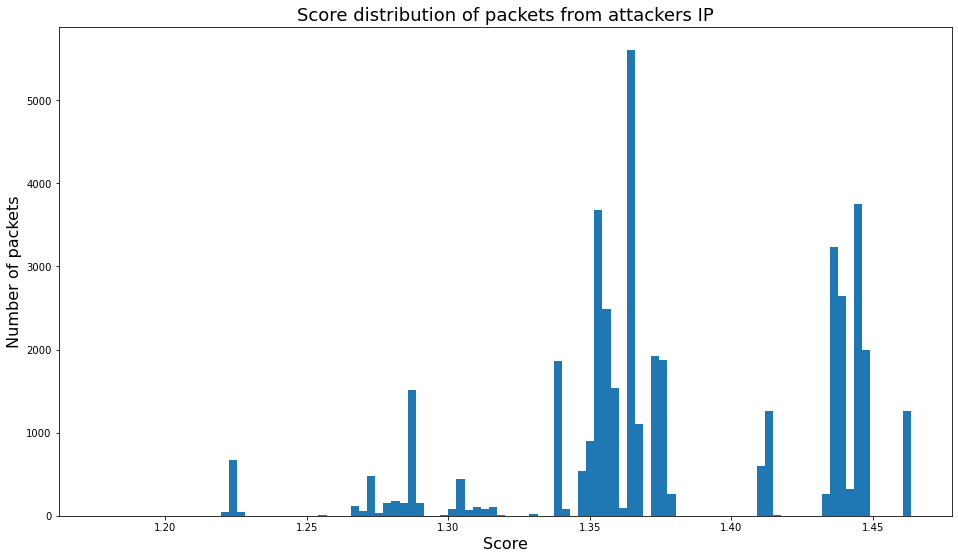

In [63]:
plt.figure(figsize=(16,9))
plt.hist(dictionary_attack_df['score'],bins = 100)
plt.xlabel("Score", fontsize = 16)
plt.ylabel("Number of packets",fontsize = 16)
plt.title("Score distribution of packets from attackers IP",fontsize = 18)
plt.savefig("score_distribution_of_attack.png", dpi = 300, bbox_inches = "tight")

1.44412149629757

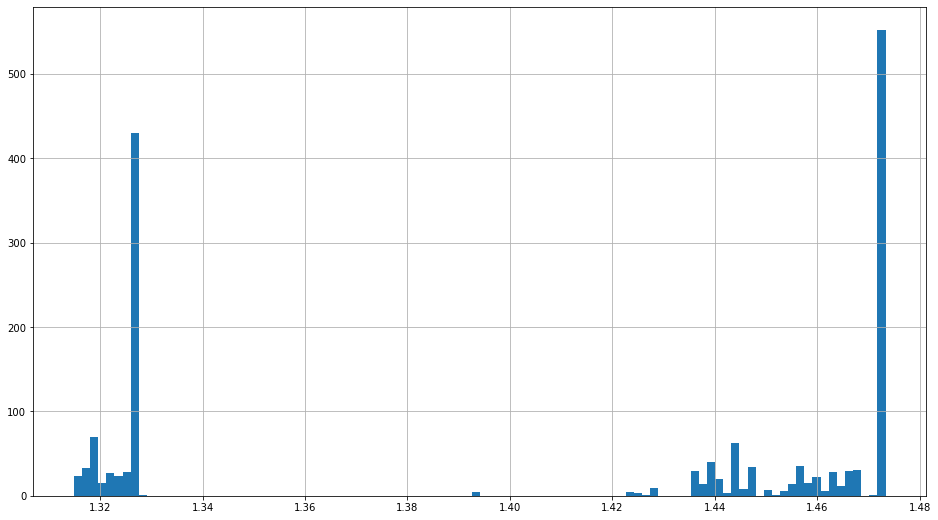

In [64]:
wordpress = attack_df[attack_df["ip.dst"] == '89.100.107.147']


# In[15]:
wordpress['score'].hist(bins = 100)


# In[20]:
wordpress['score'].median()

In [65]:
attack_df['score'].describe().apply(lambda x: format(x, 'f'))

count    1070554.000000
mean           0.488171
std            0.230004
min            0.274564
25%            0.404716
50%            0.426432
75%            0.447615
max            6.573879
Name: score, dtype: object

In [66]:
nmap_df['score'].describe().apply(lambda x: format(x, 'f'))

count    41824.000000
mean         1.380329
std          0.053284
min          1.176635
25%          1.354040
50%          1.365800
75%          1.437380
max          1.463493
Name: score, dtype: object

In [67]:
attack_df['score'].quantile(0.932)

1.0046321075064268

In [68]:
41824/1070554

0.03906762293167836

In [71]:
anomalous_dict = attack_df[attack_df['score'] > 0.72]

In [75]:
anomalous_dict['ip.dst'].value_counts()

89.100.107.148     41824
20.126.199.164     14160
10.244.0.7          9243
10.244.0.11         1765
168.63.129.16       1657
89.100.107.147      1641
10.244.0.2           803
10.244.0.10          643
13.69.65.27          632
13.69.65.31          530
10.244.0.3           529
10.244.0.4           513
13.69.65.29          476
10.244.0.9           450
13.69.67.61          398
10.244.0.15          248
10.244.0.6           245
10.244.0.5           206
20.50.65.82          104
40.113.176.128        86
66.249.83.16          82
13.69.114.0           67
10.244.0.14           66
66.249.83.12          65
142.250.179.138       57
10.240.0.4            50
66.249.81.204         45
13.69.106.211         39
13.69.106.212         38
198.143.164.251       38
13.69.106.217         30
52.236.186.218        29
13.69.106.89          29
142.251.36.42         29
151.139.128.11        25
198.143.164.243       24
99.84.11.83           23
13.69.106.216         20
13.69.106.208         19
66.249.81.206         15


In [77]:
anomalous_dict[(anomalous_dict['source_pod'] ==1) & (anomalous_dict['destination_pod'] ==1)]

,length,timestamp,eth.src,eth.dst,eth.type,ip.src,ip.dst,ip.version,ip.proto,ip.len,...,load_14,load_15,load_16,load_17,load_18,load_19,protocol,protocol.sport,protocol.dport,score
129051,1946,1.647534e+09,6a:77:c0:85:72:c3,ce:4c:77:6b:35:fc,2048,10.244.0.15,10.244.0.14,4,6,1932,...,4,4,4,1,5,4,TCP,32938,3306,0.758938
129052,1946,1.647534e+09,ba:c6:5f:04:4f:62,ce:4c:77:6b:35:fc,2048,10.244.0.15,10.244.0.14,4,6,1932,...,4,4,4,1,5,4,TCP,32938,3306,0.758938
288145,7306,1.647534e+09,6a:77:c0:85:72:c3,ce:4c:77:6b:35:fc,2048,10.244.0.15,10.244.0.14,4,6,7292,...,4,4,4,1,5,4,TCP,36104,3306,0.769820
288146,7306,1.647534e+09,ba:c6:5f:04:4f:62,ce:4c:77:6b:35:fc,2048,10.244.0.15,10.244.0.14,4,6,7292,...,4,4,4,1,5,4,TCP,36104,3306,0.769820
288149,3464,1.647534e+09,6a:77:c0:85:72:c3,ce:4c:77:6b:35:fc,2048,10.244.0.15,10.244.0.14,4,6,3450,...,3,4,3,5,3,10,TCP,36104,3306,0.887382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834682,17442,1.647534e+09,ba:c6:5f:04:4f:62,ce:4c:77:6b:35:fc,2048,10.244.0.15,10.244.0.14,4,6,17428,...,2,0,6,1,7,2,TCP,47050,3306,0.733174
834683,17416,1.647534e+09,6a:77:c0:85:72:c3,ce:4c:77:6b:35:fc,2048,10.244.0.15,10.244.0.14,4,6,17402,...,7,3,6,5,2,0,TCP,47050,3306,0.733221
834684,17416,1.647534e+09,ba:c6:5f:04:4f:62,ce:4c:77:6b:35:fc,2048,10.244.0.15,10.244.0.14,4,6,17402,...,7,3,6,5,2,0,TCP,47050,3306,0.733221
875094,4249,1.647534e+09,6a:77:c0:85:72:c3,ce:4c:77:6b:35:fc,2048,10.244.0.15,10.244.0.14,4,6,4235,...,4,4,4,1,5,4,TCP,47862,3306,0.975396


In [76]:
attack_df[attack_df["ip.dst"] == '89.100.107.147']

,length,timestamp,eth.src,eth.dst,eth.type,ip.src,ip.dst,ip.version,ip.proto,ip.len,...,load_14,load_15,load_16,load_17,load_18,load_19,protocol,protocol.sport,protocol.dport,score
6118,74,1.647534e+09,6a:77:c0:85:72:c3,ba:c6:5f:04:4f:62,2048,10.244.0.15,89.100.107.147,4,6,60,...,0,0,0,0,0,0,TCP,8080,62259,1.318771
6123,66,1.647534e+09,6a:77:c0:85:72:c3,ba:c6:5f:04:4f:62,2048,10.244.0.15,89.100.107.147,4,6,52,...,0,0,0,0,0,0,TCP,8080,62259,1.318816
6470,2962,1.647534e+09,6a:77:c0:85:72:c3,ba:c6:5f:04:4f:62,2048,10.244.0.15,89.100.107.147,4,6,2948,...,3,1,2,0,3,2,TCP,8080,62259,1.326011
6471,2962,1.647534e+09,6a:77:c0:85:72:c3,ba:c6:5f:04:4f:62,2048,10.244.0.15,89.100.107.147,4,6,2948,...,10,13,1,10,15,5,TCP,8080,62259,1.326011
6472,2962,1.647534e+09,6a:77:c0:85:72:c3,ba:c6:5f:04:4f:62,2048,10.244.0.15,89.100.107.147,4,6,2948,...,14,11,10,4,14,14,TCP,8080,62259,1.326011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064353,66,1.647534e+09,6a:77:c0:85:72:c3,ba:c6:5f:04:4f:62,2048,10.244.0.15,89.100.107.147,4,6,52,...,0,0,0,0,0,0,TCP,8080,62664,1.326858
1064355,74,1.647534e+09,6a:77:c0:85:72:c3,ba:c6:5f:04:4f:62,2048,10.244.0.15,89.100.107.147,4,6,60,...,0,0,0,0,0,0,TCP,8080,62681,1.326934
1064358,66,1.647534e+09,6a:77:c0:85:72:c3,ba:c6:5f:04:4f:62,2048,10.244.0.15,89.100.107.147,4,6,52,...,0,0,0,0,0,0,TCP,8080,62681,1.326976
1064533,688,1.647534e+09,6a:77:c0:85:72:c3,ba:c6:5f:04:4f:62,2048,10.244.0.15,89.100.107.147,4,6,674,...,3,1,2,0,3,2,TCP,8080,62681,1.323891


In [19]:
len(anomalous_dict)

32531

<AxesSubplot:>

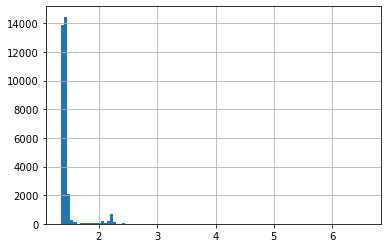

In [20]:
anomalous_dict['score'].hist(bins = 100)

<AxesSubplot:>

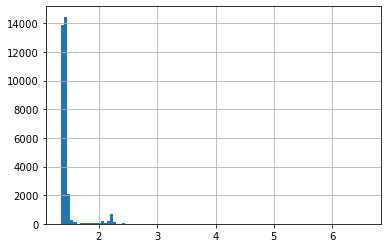

In [21]:
anomalous_dict['score'].hist(bins = 100)

In [23]:
time_analysis = normal_df.copy()

In [28]:
time_analysis['timestamp'].describe().apply(lambda x: format(x, 'f'))

count        140538.000000
mean     1647531756.040059
std             178.428050
min      1647531462.379940
25%      1647531589.512600
50%      1647531759.449429
75%      1647531912.643675
max      1647532060.965540
Name: timestamp, dtype: object

In [33]:
time_analysis['timestamp_int'] = time_analysis['timestamp'].astype('int') #this is in seconds

In [37]:
min_timestamp = time_analysis['timestamp_int'].min()
max_timestamp = time_analysis['timestamp_int'].max()

In [35]:
min_timestamp

1647531462

In [36]:
interval = 10 # ten seconds

In [38]:
max_timestamp

1647532060

In [39]:
max_timestamp - min_timestamp

598

In [42]:
time_analysis['packet_flow_10_s'] = 0

In [43]:
time_analysis

,length,timestamp,eth.src,eth.dst,eth.type,ip.src,ip.dst,ip.version,ip.proto,ip.len,...,load_15,load_16,load_17,load_18,load_19,protocol,protocol.sport,protocol.dport,timestamp_int,packet_flow_10_s
0,144,1.647531e+09,6a:77:c0:85:72:c3,ce:4c:77:6b:35:fc,2048,10.244.0.15,10.244.0.14,4,6,130,...,12,4,5,4,3,TCP,52866,3306,1647531462,0
1,144,1.647531e+09,ba:c6:5f:04:4f:62,ce:4c:77:6b:35:fc,2048,10.244.0.15,10.244.0.14,4,6,130,...,12,4,5,4,3,TCP,52866,3306,1647531462,0
2,66,1.647531e+09,ce:4c:77:6b:35:fc,6a:77:c0:85:72:c3,2048,10.244.0.14,10.244.0.15,4,6,52,...,0,0,0,0,0,TCP,3306,52866,1647531462,0
3,78,1.647531e+09,ce:4c:77:6b:35:fc,6a:77:c0:85:72:c3,2048,10.244.0.14,10.244.0.15,4,6,64,...,0,0,0,0,0,TCP,3306,52866,1647531462,0
4,186,1.647531e+09,ce:4c:77:6b:35:fc,6a:77:c0:85:72:c3,2048,10.244.0.14,10.244.0.15,4,6,172,...,0,0,2,0,3,TCP,3306,52866,1647531462,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140533,203,1.647532e+09,3a:e0:26:66:ba:06,ba:c6:5f:04:4f:62,2048,10.244.0.9,10.244.0.1,4,6,189,...,1,2,0,3,2,TCP,8080,50410,1647532060,0
140534,66,1.647532e+09,ba:c6:5f:04:4f:62,3a:e0:26:66:ba:06,2048,10.244.0.1,10.244.0.9,4,6,52,...,0,0,0,0,0,TCP,50410,8080,1647532060,0
140535,66,1.647532e+09,3a:e0:26:66:ba:06,ba:c6:5f:04:4f:62,2048,10.244.0.9,10.244.0.1,4,6,52,...,0,0,0,0,0,TCP,8080,50410,1647532060,0
140536,66,1.647532e+09,ba:c6:5f:04:4f:62,3a:e0:26:66:ba:06,2048,10.244.0.1,10.244.0.9,4,6,52,...,0,0,0,0,0,TCP,50410,8080,1647532060,0


In [102]:
total_packet_list = []

for ts in range(min_timestamp, max_timestamp , 10):
    
    interval = 9
    if ts + interval > max_timestamp:
        interval = max_timestamp - ts
    
    time_df = time_analysis[time_analysis['timestamp_int'].between(ts, ts+interval)].copy()
    sum_ts+=len(time_df)
    
    ip_value_count_dict = time_df['ip.dst'].value_counts().to_dict()
    
    time_df['packet_flow_10_s'] = time_df['ip.dst'].apply(lambda x: ip_value_count_dict[str(x)])

    for x in list(time_df['packet_flow_10_s']):
        total_packet_list.append(x)
    
    
    
    

In [103]:
len(total_packet_list)

140538

In [105]:
time_analysis['packet_flow_10_s'] = total_packet_list

In [106]:
time_analysis['packet_flow_10_s']

0         252
1         252
2         337
3         337
4         337
         ... 
140533     72
140534     50
140535     72
140536     50
140537     72
Name: packet_flow_10_s, Length: 140538, dtype: int64

In [101]:
time_analysis[time_analysis['timestamp_int'].between(ts, ts+interval+1)]

,length,timestamp,eth.src,eth.dst,eth.type,ip.src,ip.dst,ip.version,ip.proto,ip.len,...,load_15,load_16,load_17,load_18,load_19,protocol,protocol.sport,protocol.dport,timestamp_int,packet_flow_10_s
137899,121,1.647532e+09,e2:04:5c:48:e6:48,3a:e0:26:66:ba:06,2048,10.244.0.2,10.244.0.9,4,17,107,...,0,0,0,0,0,UDP,45390,53,1647532052,0
137900,121,1.647532e+09,ba:c6:5f:04:4f:62,3a:e0:26:66:ba:06,2048,10.244.0.2,10.244.0.9,4,17,107,...,0,0,0,0,0,UDP,45390,53,1647532052,0
137901,121,1.647532e+09,e2:04:5c:48:e6:48,3a:e0:26:66:ba:06,2048,10.244.0.2,10.244.0.9,4,17,107,...,0,0,0,0,0,UDP,45390,53,1647532052,0
137902,121,1.647532e+09,ba:c6:5f:04:4f:62,3a:e0:26:66:ba:06,2048,10.244.0.2,10.244.0.9,4,17,107,...,0,0,0,0,0,UDP,45390,53,1647532052,0
137903,394,1.647532e+09,3a:e0:26:66:ba:06,e2:04:5c:48:e6:48,2048,10.244.0.9,10.244.0.2,4,17,380,...,0,0,0,0,0,UDP,53,45390,1647532052,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140533,203,1.647532e+09,3a:e0:26:66:ba:06,ba:c6:5f:04:4f:62,2048,10.244.0.9,10.244.0.1,4,6,189,...,1,2,0,3,2,TCP,8080,50410,1647532060,0
140534,66,1.647532e+09,ba:c6:5f:04:4f:62,3a:e0:26:66:ba:06,2048,10.244.0.1,10.244.0.9,4,6,52,...,0,0,0,0,0,TCP,50410,8080,1647532060,0
140535,66,1.647532e+09,3a:e0:26:66:ba:06,ba:c6:5f:04:4f:62,2048,10.244.0.9,10.244.0.1,4,6,52,...,0,0,0,0,0,TCP,8080,50410,1647532060,0
140536,66,1.647532e+09,ba:c6:5f:04:4f:62,3a:e0:26:66:ba:06,2048,10.244.0.1,10.244.0.9,4,6,52,...,0,0,0,0,0,TCP,50410,8080,1647532060,0


In [110]:
normal_df['timestamp'] = normal_df['timestamp'].apply(lambda x: int(x))

In [111]:
normal_df['timestamp']

0         1647531462
1         1647531462
2         1647531462
3         1647531462
4         1647531462
             ...    
140533    1647532060
140534    1647532060
140535    1647532060
140536    1647532060
140537    1647532060
Name: timestamp, Length: 140538, dtype: int64